# Adatvizualizáció (Data visualization) - minta

- Mi az adatvizualizáció szerepe?
- Mire van szükség vizualizáció készítéséhez?
- Mit lehet vizualizálni?

### Szükséges könyvtárak dokumentációja

- Pandas - https://pandas.pydata.org/docs/user_guide/index.html - adathalmazzal való munkát segíti 
- NumPy - https://numpy.org/doc/stable/user/basics.html - többdimenziós tömbök és numerikus feladatok kezelését végző könyvtár 
- Matplotlib - https://matplotlib.org/stable/plot_types/index.html - fejlett vizualizációs könyvtár 
- Seaborn - https://seaborn.pydata.org/examples/index.html - vizualizációs könyvtár 
- Plotly - https://plotly.com/python/ - interaktív vizualizációk létrehozását segítő könyvtár 

### Szükséges könyvtárak telepítése

Könyvtárakat telepíteni csak egyszer szükséges. Ehhez futtatás előtt a "#"-et el kell távolítani. Telepítés után "#" visszaállítható, így nem fogja minden futtatás előtt a könyvtárakat ellenőrizni.

In [29]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install plotly
#%pip install numpy
#%pip install nbformat

### Könyvtárak importálása

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode

## 1. Bevezetés

Egyszerű függvény ábrázolása Matplotlib segítségével.
A <code>np.linspace</code> parancs megadott intervallumon egymástól egyenlő távolságra elhelyezkedő értékeket hoz létre.

In [31]:
x = np.linspace(0,10,100)
y = 4 + 2 * np.sin(2*x)

### Ábra létrehozása

<code>plt.subplot</code> létrehozza az ábrát, de jelenleg még nem igazán látványos.

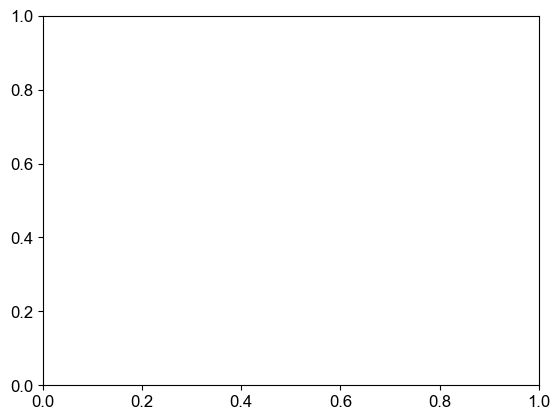

In [32]:
fig, ax = plt.subplots()

### Értékek hozzáadása az ábrához

Az egyszerű vonaldiagramhoz számos tulajdonság tartozik, ami megkönnyíti a diagram beállítását: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

<code>color</code> vagy <code>c</code> - szín

<code>linestyle</code> vagy <code>ls</code> - {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}

<code>linewidth</code> vagy <code>lw</code> - float

<code>label</code> - objektum

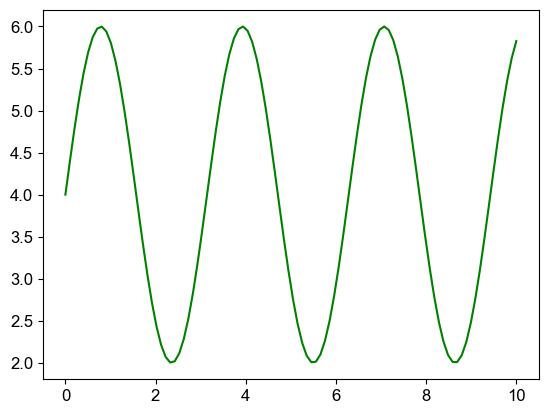

In [33]:
ax.plot(x,y, color = "green")

display(fig)

### Részletek hozzáadása

Tengelyek elnevezése és cím megadása

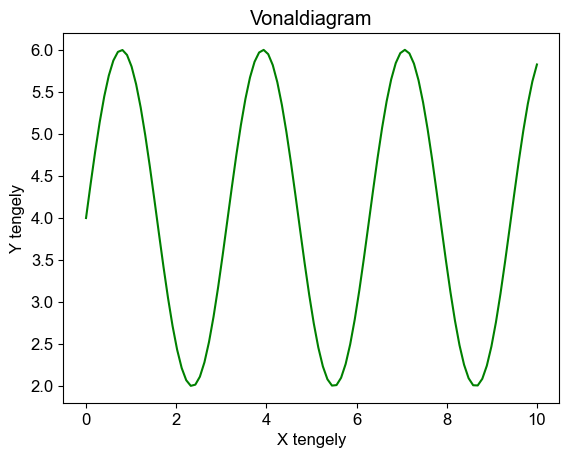

In [34]:
ax.set_xlabel("X tengely")
ax.set_ylabel("Y tengely")
ax.set_title("Vonaldiagram")

display(fig)

## Pont XY diagram

- Bővítsük a diagramot a következő tulajdonságokkal:
s=sizes, c=colors, vmin=0, vmax=100

- Mit csinál az xlim/ylim és xticks/yticks?

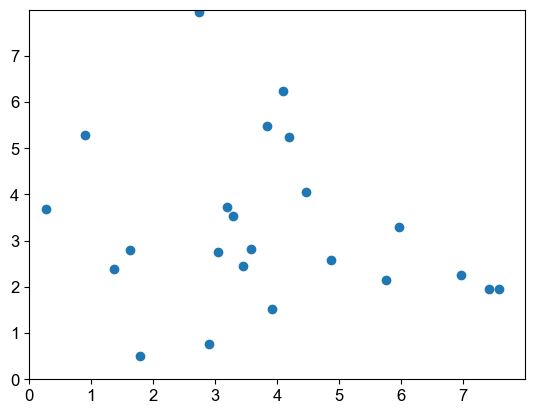

In [35]:
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, 24)

fig, ax = plt.subplots()

ax.scatter(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(0, 8),
       ylim=(0, 8), yticks=np.arange(0, 8))

plt.show()

## Idővonal

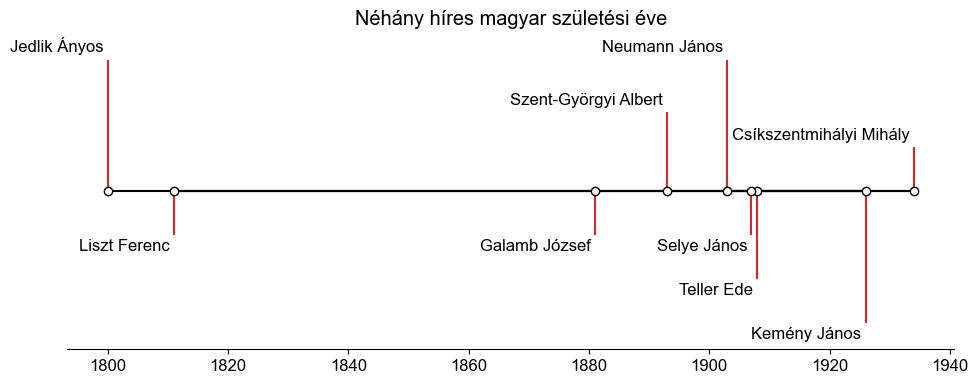

In [56]:
import matplotlib

name = ["Neumann János", "Teller Ede", "Csíkszentmihályi Mihály", "Selye János", "Liszt Ferenc", "Galamb József", "Kemény János", "Szent-Györgyi Albert", "Jedlik Ányos"]
szuletett = [1903, 1908,1934,1907,1811,1881,1926,1893,1800]
elhunyt = [1957,2003,2021,1982,1886,1955,1992,1986,1895]

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}

levels = np.tile([3, -2, 1, -1, -1, -1, -3, 1.8, 3], int(np.ceil(len(szuletett)/6)))[:len(szuletett)]

fig, ax = plt.subplots(figsize=(10, 4))
ax.set(title="Néhány híres magyar születési éve")

ax.vlines(szuletett, 0, levels, color="tab:red")

ax.plot(szuletett, np.zeros_like(szuletett), "-o", color="k", markerfacecolor="w")


for d, l, event in zip(szuletett, levels, name):
    ax.annotate(event, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

plt.setp(ax.get_xticklabels(), ha="center")

ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.tight_layout()
plt.show()

## 2. Adatok beolvasása fájlból

Leggyakrabban .csv, vagy .xlsx fájlok használatosak.

<code>delimiter</code> - megadja, hogy milyen karakterrel vannak elválasztva az adatok

<code>header</code> - megadható a fejléc sora

<code>index_col</code> - melyik oszlopot használhatja indexként az adathalmazon belül

In [37]:
df = pd.read_csv("countries.csv")

Első néhány sor kiíratása

In [38]:
print(df.head())

  countryCode           countryName currencyCode  population  \
0          AD               Andorra          EUR       77006   
1          AE  United Arab Emirates          AED     9630959   
2          AF           Afghanistan          AFN    37172386   
3          AG   Antigua and Barbuda          XCD       96286   
4          AI              Anguilla          XCD       13254   

            capital continent  areaInSqKm  
0  Andorra la Vella        EU       468.0  
1         Abu Dhabi        AS     82880.0  
2             Kabul        AS    647500.0  
3         St John's       NaN       443.0  
4        The Valley       NaN       102.0  


In [39]:
df.describe()

,population,areaInSqKm
count,2.500000e+02,2.500000e+02
mean,3.045990e+07,5.996369e+05
std,1.286485e+08,1.911821e+06
min,0.000000e+00,0.000000e+00
25%,1.965225e+05,1.174750e+03
50%,4.742677e+06,6.489450e+04
75%,1.809831e+07,3.726315e+05
max,1.411779e+09,1.710000e+07


In [40]:
df.count()

countryCode     249
countryName     250
currencyCode    249
population      250
capital         241
continent       209
areaInSqKm      250
dtype: int64

### Adatok megjelenítése

In [41]:
fig = px.pie(df, values = "population" ,names = "countryName")

fig.show()

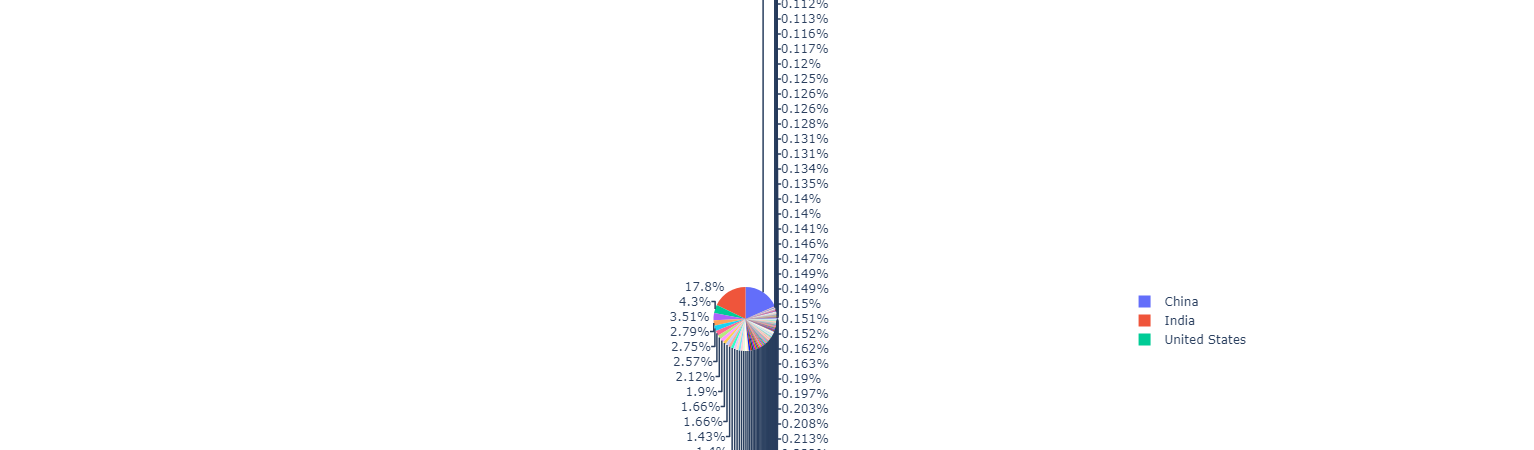

A diagram ebben a formában még nem tökéletes. Próbáljunk meg adatokat szűrni.

In [42]:
top5 = df.sort_values(by = "population", ascending=False).head(5)

fig = px.pie(top5, values="population", names ="countryName", title = "A legnépesebb 5 ország")
fig.show()

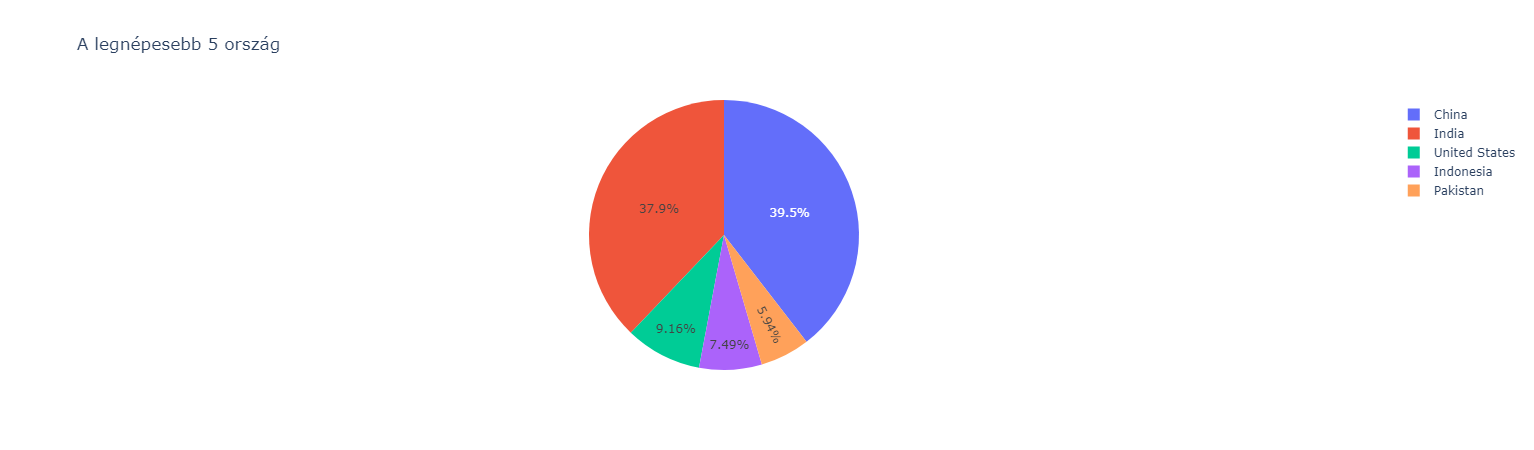

A diagram Plotly esetén is magas szinten testreszabható. Pl.: a szöveg mérete beállítható <code>fig.update_traces(textfont_size = érték)</code> vonalvastagság <code>fig.update_traces(marker = dict(line = dict(color = "szín", width = érték)))</code> paranccsal.

In [43]:
fig.update_traces(textfont_size = 16)
fig.update_traces(marker = dict(line = dict(color = "black", width = 2)))

fig.show()

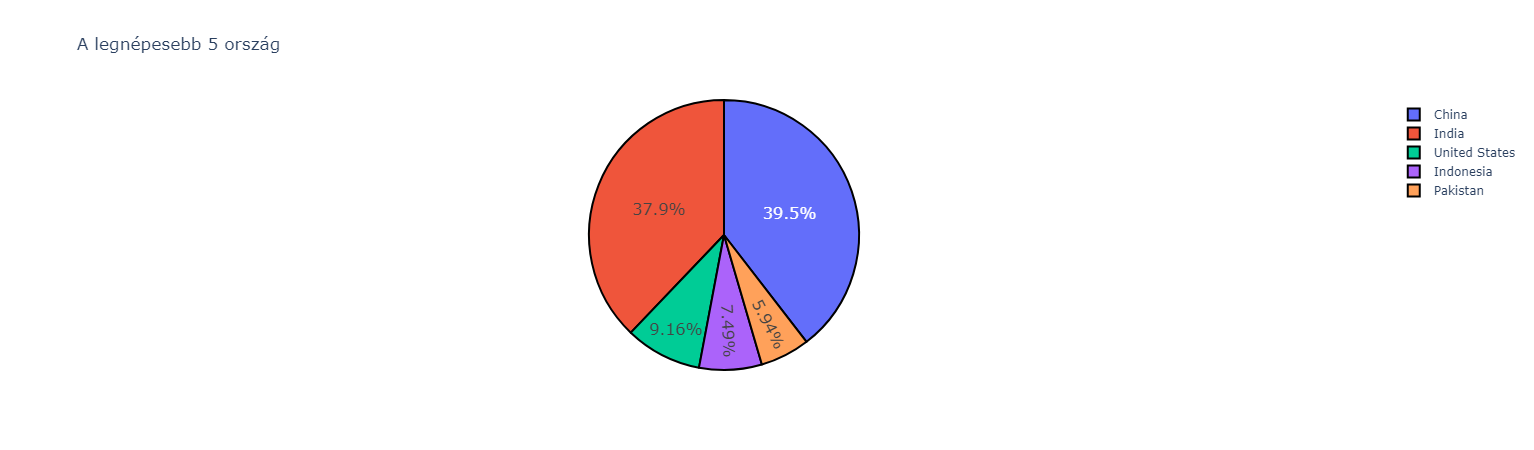

In [44]:
top20 = df.sort_values(by = "areaInSqKm", ascending=False).head(20)

fig = px.bar(top20, x = "countryName", y ="areaInSqKm", title="A 20 legnagyobb területű ország")

fig.show()

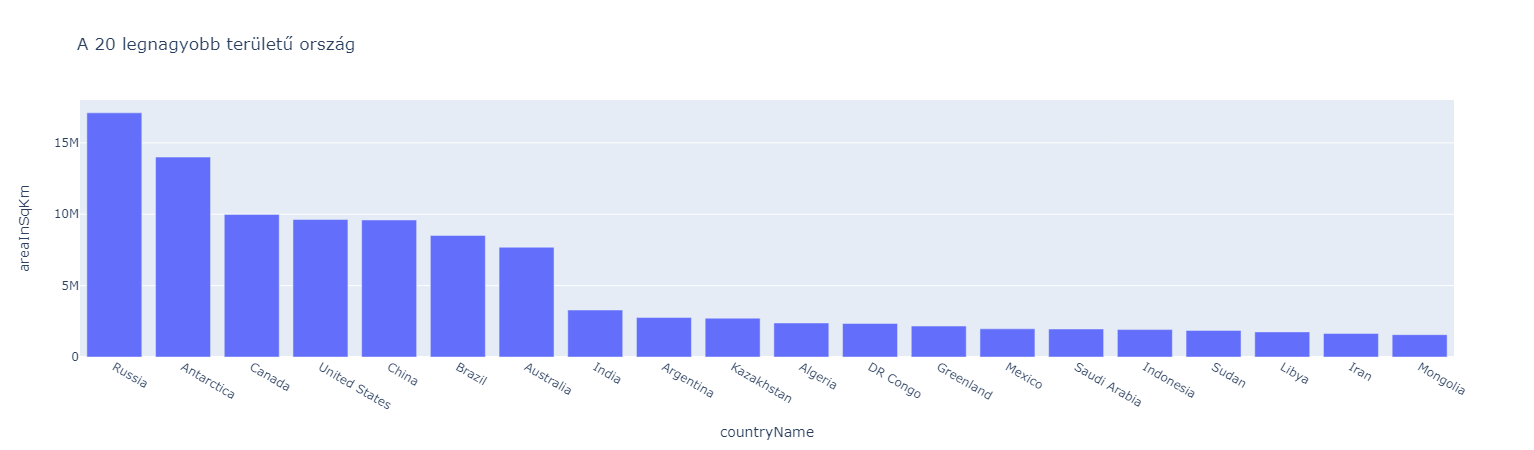

## Treemap diagramtípus

Gyűjtsük ki kontinensenként az 5 legnagyobb területű országot és ábrázoljuk fadiagrammal.

In [45]:
continents = df["continent"].unique()
print(continents)

['EU' 'AS' nan 'AF' 'AN' 'SA' 'OC']


In [46]:
df_temp = []

for continent in continents:
    continentValues = df[df['continent'] == continent].sort_values(by='areaInSqKm', ascending=False).head(5)
    df_temp.append(continentValues)

df_sorted = pd.concat(df_temp)
fig=px.treemap(df_sorted, path=['continent','countryName'], values='areaInSqKm', 
                title="Legnagyobb országok kontinensenként", 
                width=1200, height=600)

fig.show()

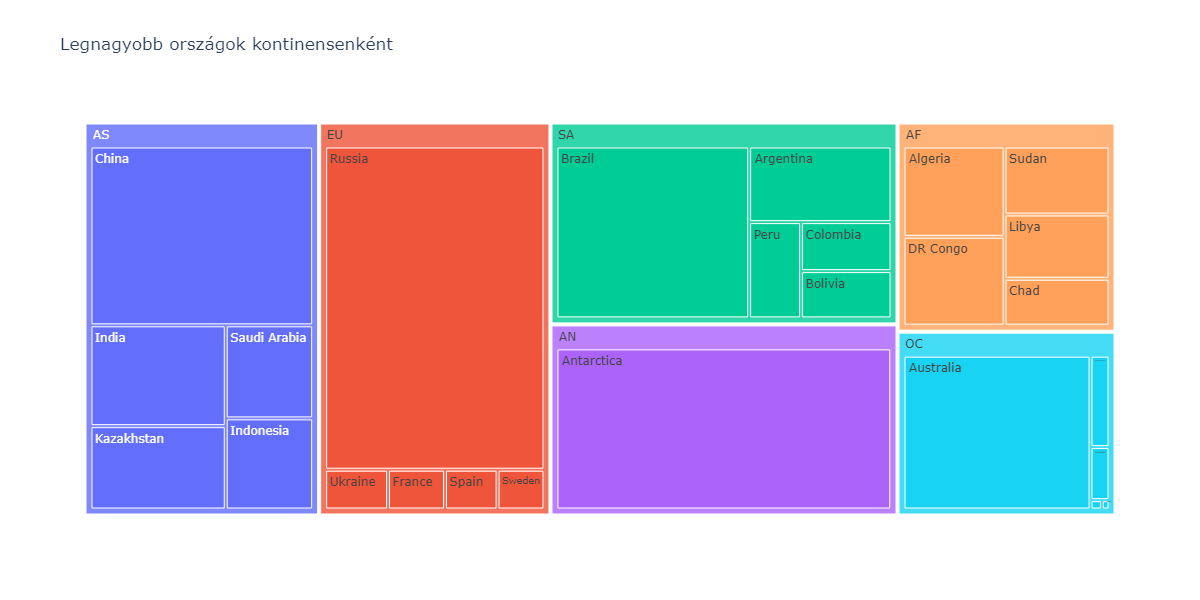

## Feladat 

Egy nap 24 órából áll. Készítsetek kördiagramot a napi rutinotokról.

In [47]:
day = {"activity_name": ["alvás", "tanulás","játék","olvasás","iskola"],
       "activity_duration": [8,2,5,2,7]}

fig = px.pie(day, names="activity_name", values="activity_duration", title = "Egy átlagos napom")

fig.update_traces(textposition='inside', textinfo='label+value')

fig.show()

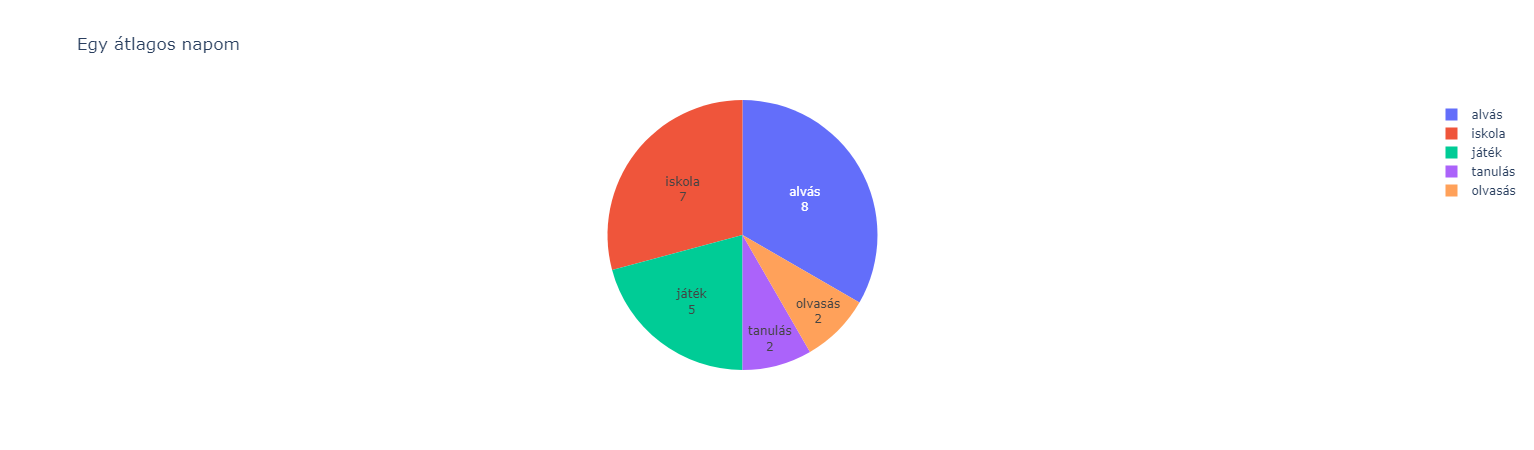